### Hierarchical clustering (input: precalculated distance)  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#### Parameters  

In [2]:
csv_in = 'sushi_corr25_dist.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file (distance data)    

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())
items = df.columns
print(items)

(25, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ebi        25 non-null     float64
 1   anago      25 non-null     float64
 2   maguro     25 non-null     float64
 3   ika        25 non-null     float64
 4   uni        25 non-null     float64
 5   tako       25 non-null     float64
 6   ikura      25 non-null     float64
 7   tamago     25 non-null     float64
 8   amaebi     25 non-null     float64
 9   hotategai  25 non-null     float64
 10  tai        25 non-null     float64
 11  akagai     25 non-null     float64
 12  hamachi    25 non-null     float64
 13  awabi      25 non-null     float64
 14  samon      25 non-null     float64
 15  kazunoko   25 non-null     float64
 16  shako      25 non-null     float64
 17  saba       25 non-null     float64
 18  chu_toro   25 non-null     float64
 19  hirame     25 non-null     float64
 20  aji

,ebi,anago,maguro,ika,uni,tako,ikura,tamago,amaebi,hotategai,tai,akagai,hamachi,awabi,samon,kazunoko,shako,saba,chu_toro,hirame,aji,kohada,torigai,unagi,kanpachi
0,0.000,0.479,0.489,0.397,0.489,0.401,0.513,0.450,0.338,0.406,0.498,0.442,0.525,0.458,0.465,0.446,0.404,0.532,0.502,0.485,0.501,0.471,0.444,0.429,0.527
1,0.479,0.000,0.443,0.492,0.406,0.462,0.489,0.444,0.445,0.397,0.431,0.428,0.423,0.391,0.416,0.466,0.340,0.363,0.420,0.369,0.372,0.344,0.406,0.196,0.393
2,0.489,0.443,0.000,0.411,0.472,0.487,0.475,0.552,0.467,0.472,0.374,0.494,0.319,0.504,0.380,0.468,0.516,0.411,0.248,0.358,0.349,0.483,0.531,0.464,0.357
3,0.397,0.492,0.411,0.000,0.453,0.219,0.516,0.539,0.390,0.362,0.442,0.346,0.435,0.407,0.501,0.455,0.431,0.475,0.472,0.414,0.425,0.496,0.360,0.467,0.396
4,0.489,0.406,0.472,0.453,0.000,0.520,0.321,0.555,0.407,0.339,0.405,0.325,0.394,0.303,0.439,0.387,0.314,0.368,0.392,0.364,0.390,0.398,0.333,0.388,0.356


Index(['ebi', 'anago', 'maguro', 'ika', 'uni', 'tako', 'ikura', 'tamago',
       'amaebi', 'hotategai', 'tai', 'akagai', 'hamachi', 'awabi', 'samon',
       'kazunoko', 'shako', 'saba', 'chu_toro', 'hirame', 'aji', 'kohada',
       'torigai', 'unagi', 'kanpachi'],
      dtype='object')


#### Convert N x N distance matrix into condensed distance matrix  

In [4]:
v = squareform(df.values)
print(type(v))
print(v.shape)

<class 'numpy.ndarray'>
(300,)


#### Execute clustering  

In [5]:
Z = linkage(v, method='complete', metric='correlation')
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2', 'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z)

,label1,label2,distance,#members
merged25,12,24,0.092,2
merged26,11,22,0.110,2
merged27,17,21,0.142,2
merged28,10,19,0.187,2
merged29,13,26,0.190,3
merged30,1,23,0.196,2
merged31,3,5,0.219,2
merged32,20,27,0.237,3
merged33,2,18,0.248,2
merged34,25,32,0.296,5


#### Draw dendgrogram  

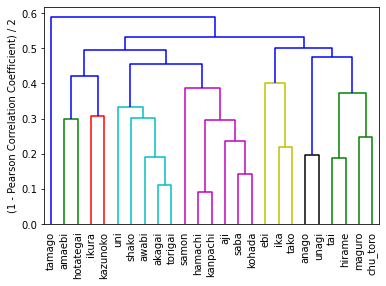

In [6]:
dendr = dendrogram(Z, labels=items)
plt.xticks(rotation=90)
plt.ylabel('(1 - Pearson Correlation Coefficient) / 2')
plt.show()

#### Get the results of clustering (specify the number of clusters)  

In [7]:
dist = df_Z['distance']
for i in range(1, n_data+1):
    print('=== n_clusters:', i, '===')
    cls = pd.Series(fcluster(Z, i, criterion='maxclust'), index=items)
    print('dist:', dist[n_data-i])
    print(cls)

=== n_clusters: 1 ===
dist: 0.589
ebi          1
anago        1
maguro       1
ika          1
uni          1
tako         1
ikura        1
tamago       1
amaebi       1
hotategai    1
tai          1
akagai       1
hamachi      1
awabi        1
samon        1
kazunoko     1
shako        1
saba         1
chu_toro     1
hirame       1
aji          1
kohada       1
torigai      1
unagi        1
kanpachi     1
dtype: int32
=== n_clusters: 2 ===
dist: 0.532
ebi          1
anago        1
maguro       1
ika          1
uni          1
tako         1
ikura        1
tamago       2
amaebi       1
hotategai    1
tai          1
akagai       1
hamachi      1
awabi        1
samon        1
kazunoko     1
shako        1
saba         1
chu_toro     1
hirame       1
aji          1
kohada       1
torigai      1
unagi        1
kanpachi     1
dtype: int32
=== n_clusters: 3 ===
dist: 0.502
ebi          2
anago        2
maguro       2
ika          2
uni          1
tako         2
ikura        1
tamago       3
am